In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import sys
sys.path.append('../')

import os

os.environ["KMP_DUPLICATE_LIB_OK"] = "True"

import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.colors as mcolors

from src.utils.video_utils import get_video, get_frame_from_video
from src.utils.ground_utils import get_mask as get_ground_mask
from src.utils.ground_utils import get_model_from as get_ground_model_from

DATA_PATH = '../data/'
GENERATED_PATH = '../generated/'
LDR_PATH = f'{DATA_PATH}ldr/'
GENERATED_MASK_PATH = f'{GENERATED_PATH}sky_cloud_segmentation/scene_masks/'

In [12]:
ground_model_type = 'deeplabv3mobilenetv3large'
ground_model_save_path = f"{DATA_PATH}sky_ground_segmentation/models/{ground_model_type}_ranger_pretrained.pth"
ground_model = get_ground_model_from(model_save_path=ground_model_save_path, model_type=ground_model_type)

✅ Loaded pretrained model deeplabv3mobilenetv3large with 11,024,445 learnable parameters.
✅ Loaded model from ../data/sky_ground_segmentation/models/deeplabv3mobilenetv3large_ranger_pretrained.pth


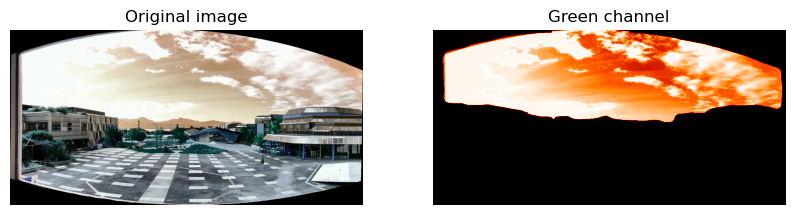

In [22]:
# Get scene frame
scene_path = f'{LDR_PATH}processed/P1Scene05.mp4'
scene_video = get_video(scene_path)
scene_frame, _ = get_frame_from_video(scene_video, 3, split=False, masked=True, reframed=True)
rgb_frame = cv2.cvtColor(scene_frame, cv2.COLOR_BGR2RGB)

# Get ground mask
scene_ground_mask = get_ground_mask(rgb_frame / 255, ground_model)
rgb_frame = rgb_frame * scene_ground_mask[:, :, np.newaxis]

# Get l channel
l = rgb_frame[:, :, 1]

# Plot green channel
fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(1, 2)

ax0 = fig.add_subplot(gs[0, 0])
ax0.imshow(scene_frame)
ax0.set_title('Original image')
ax0.axis('off')

ax1 = fig.add_subplot(gs[0, 1])
ax1.imshow(l, cmap='gist_heat')
ax1.set_title('Green channel')
ax1.axis('off')

plt.show()